# DB2 Data Cleaning

## Introduction

In this project, we aim to predict the performance of database transfers based on various system and transfer-related parameters. We utilize performance benchmark datasets from nine different experiments to train and evaluate several machine learning models. The target variable for our prediction is the `TotaltransferTime`.

The steps involved in this project are as follows:
1. **Data Loading and Concatenation**: Load performance data from nine experiments and concatenate them into a single DataFrame.
2. **Feature Engineering**: Aggregate relevant table statistics and add them to the main DataFrame.
3. **Data Cleaning**: Remove duplicate rows and handle missing values.
4. **Data Visualization**: Visualize data to understand correlations and distributions.
5. **Data Preprocessing**: Create preprocessing pipelines for numerical and categorical data.
6. **Model Selection and Training**: Train multiple machine learning models and evaluate their performance.

## 1. Data Loading and Concatenation

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import dalex as dx
import matplotlib.pyplot as plt
import yaml

Declairing all the tables that we use in the experiemtns.

In [3]:
tables = {
    'Table name': ["LINEITEM1", "GIGANTICORDERS", "ORDERS2", "ORDERS3", "ORDERS4", "ORDERS5", "ORDERS6", "ORDERS7", "ORDERS8", "ORDERS10", "ORDERSWIDE2"],
    'Data size(MB)': [674, 5477, 1825, 1825, 1825, 1825, 1825, 1825, 1825, 275, 5337],
    'number of rows': [3894493, 45000000, 15000000, 15000000, 15000000, 15000000, 15000000, 15000000,  15000000, 1993416, 15000000],
    'number of columns': [16, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27]
    }

tables_df = pd.DataFrame(tables)
tables_df.head()

,Table name,Data size(MB),number of rows,number of columns
0,LINEITEM1,674,3894493,16
1,GIGANTICORDERS,5477,45000000,9
2,ORDERS2,1825,15000000,9
3,ORDERS3,1825,15000000,9
4,ORDERS4,1825,15000000,9


The system configuation for the first 24 experiemnts.

In [4]:
source_machine_specs = {
    'RAM (GB)': [120],
    'CPU': [16],
    'Disk (GB)': [20],
    'External Disk (GB)': [576]
    }

source_machine_df = pd.DataFrame(source_machine_specs)
source_machine_df.head()

,RAM (GB),CPU,Disk (GB),External Disk (GB)
0,120,16,20,576


The system configuration for the 9 experiemtns in version 2 experiments.

In [7]:
v2_exp1_docker_compose = yaml.safe_load(open("C:/Users/hasti/OneDrive/Desktop/DMBench/Data Migration Performance Analyzer/Data/DB2 Performance Datasets/v2/exp1/docker-compose.yml"))
v2_exp1_docker_compose = yaml.safe_load(open("C:/Users/hasti/OneDrive/Desktop/DMBench/Data Migration Performance Analyzer/Data/DB2 Performance Datasets/v2/exp1/docker-compose.yml"))
v2_exp1_docker_compose = yaml.safe_load(open("C:/Users/hasti/OneDrive/Desktop/DMBench/Data Migration Performance Analyzer/Data/DB2 Performance Datasets/v2/exp1/docker-compose.yml"))
v2_exp1_docker_compose = yaml.safe_load(open("C:/Users/hasti/OneDrive/Desktop/DMBench/Data Migration Performance Analyzer/Data/DB2 Performance Datasets/v2/exp1/docker-compose.yml"))
v2_exp1_docker_compose = yaml.safe_load(open("C:/Users/hasti/OneDrive/Desktop/DMBench/Data Migration Performance Analyzer/Data/DB2 Performance Datasets/v2/exp1/docker-compose.yml"))
v2_exp1_docker_compose = yaml.safe_load(open("C:/Users/hasti/OneDrive/Desktop/DMBench/Data Migration Performance Analyzer/Data/DB2 Performance Datasets/v2/exp1/docker-compose.yml"))
v2_exp1_docker_compose = yaml.safe_load(open("C:/Users/hasti/OneDrive/Desktop/DMBench/Data Migration Performance Analyzer/Data/DB2 Performance Datasets/v2/exp1/docker-compose.yml"))
v2_exp1_docker_compose = yaml.safe_load(open("C:/Users/hasti/OneDrive/Desktop/DMBench/Data Migration Performance Analyzer/Data/DB2 Performance Datasets/v2/exp1/docker-compose.yml"))
v2_exp1_docker_compose = yaml.safe_load(open("C:/Users/hasti/OneDrive/Desktop/DMBench/Data Migration Performance Analyzer/Data/DB2 Performance Datasets/v2/exp1/docker-compose.yml"))


{'version': '3', 'services': {'web': {'image': 'fareshamouda/db2migrationservice:test', 'container_name': 'db2migrationservice', 'privileged': True, 'deploy': {'resources': {'limits': {'cpus': '0.1', 'memory': '10g'}}}, 'ports': ['50050:50050', '13080:13080', '14080:14080'], 'volumes': ['/run', '/sys/fs/cgroup:/sys/fs/cgroup:ro']}}}


In [ ]:
print(v2_exp1_docker_compose)

In [18]:
print(v2_exp1_docker_compose['services']['web']['deploy']['resources']['limits']['cpus'])

0.1


Importing the experiments.

In [67]:
# Load the performance benchmark datasets
exp1_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp1/performanceBenchmark.csv')
exp2_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp2/performanceBenchmark.csv')
exp3_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp3/performanceBenchmark.csv')
exp4_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp4/performanceBenchmark.csv')
exp5_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp5/performanceBenchmark.csv')
exp6_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp6/performanceBenchmark.csv')
exp7_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp7/performanceBenchmark.csv')
exp8_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp8/performanceBenchmark.csv')
exp9_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp9/performanceBenchmark.csv')
exp10_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp10/performanceBenchmark.csv')
exp11_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp11/performanceBenchmark.csv')
exp12_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp12/performanceBenchmark.csv')
exp13_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp13/performanceBenchmark.csv')
exp14_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp14/performanceBenchmark.csv')
exp15_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp15/performanceBenchmark.csv')
exp16_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp16/performanceBenchmark.csv')
exp17_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp17/performanceBenchmark.csv')
exp18_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp18/performanceBenchmark.csv')
exp19_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp19/performanceBenchmark.csv')
exp20_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp20/performanceBenchmark.csv')
exp21_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp21/performanceBenchmark.csv')
exp22_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp22/performanceBenchmark.csv')
exp23_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp23/performanceBenchmark.csv')
exp24_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/main/Data/DB2%20Performance%20Datasets/exp24/performanceBenchmark.csv')
v2_exp1_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/refs/heads/main/Data/DB2%20Performance%20Datasets/v2/exp1/performanceBenchmark.csv')
v2_exp2_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/refs/heads/main/Data/DB2%20Performance%20Datasets/v2/exp2/performanceBenchmark.csv')
v2_exp3_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/refs/heads/main/Data/DB2%20Performance%20Datasets/v2/exp3/performanceBenchmark.csv')
v2_exp4_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/refs/heads/main/Data/DB2%20Performance%20Datasets/v2/exp4/performanceBenchmark.csv')
v2_exp5_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/refs/heads/main/Data/DB2%20Performance%20Datasets/v2/exp5/performanceBenchmark.csv')
v2_exp6_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/refs/heads/main/Data/DB2%20Performance%20Datasets/v2/exp6/performanceBenchmark.csv')
v2_exp7_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/refs/heads/main/Data/DB2%20Performance%20Datasets/v2/exp7/performanceBenchmark.csv')
v2_exp8_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/refs/heads/main/Data/DB2%20Performance%20Datasets/v2/exp8/performanceBenchmark.csv')
v2_exp9_performance_df = pd.read_csv('https://raw.githubusercontent.com/yorku-ease/DmML/refs/heads/main/Data/DB2%20Performance%20Datasets/v2/exp9/performanceBenchmark.csv')

In [68]:
exp1_performance_df.head()

,Experiment Number,compress,sourceDatabasetoTargetDatabase,tables,maxStreams,binary,Experiment startTime,TotalExperimentTime,TotaltransferTime,totalPrecheckTime,TotalClearTime
0,1,NO,testdb_testdb,LINEITEM1_ORDERS2_ORDERS10,1,False,1.717525e+09,3296.018193,3266.620216,32.906244,NaN
1,2,NO,testdb_testdb,LINEITEM1_ORDERS2_ORDERS10,1,False,1.717525e+09,622.369466,588.320576,3.208371,NaN
2,3,NO,testdb_testdb,LINEITEM1_ORDERS2_ORDERS10,1,False,1.717525e+09,1945.972293,1920.935266,3.742569,NaN
3,4,NO,testdb_testdb,LINEITEM1_ORDERS2_ORDERS10,1,False,1.717525e+09,3834.102760,3783.924402,6.611556,NaN
4,5,NO,testdb_testdb,LINEITEM1_ORDERS2_ORDERS10,1,False,1.717525e+09,1933.460342,1901.642637,6.197286,NaN


In [69]:
print(exp10_performance_df.columns)

Index(['Experiment Number', 'compress', 'sourceDatabasetoTargetDatabase',
       'tables', 'maxStreams', 'binary', 'Experiment startTime',
       'TotalExperimentTime', 'TotaltransferTime', 'totalPrecheckTime',
       'TotalClearTime'],
      dtype='object')


In [71]:
v2_exp8_performance_df.drop(v2_exp8_performance_df.tail(1).index, inplace=True)
v2_exp8_performance_df.tail(10)

,Experiment Number,compress,sourceDatabasetoTargetDatabase,tables,maxStreams,binary,Experiment startTime,TotalExperimentTime,TotaltransferTime,totalPrecheckTime,TotalClearTime
4,5,NO,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726169e+09,5308.884032,4550.101039,247.407962,6.561349
5,1,GZIP,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726203e+09,4449.286099,3703.900795,289.613249,4.588818
6,2,GZIP,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726203e+09,5666.211861,4878.199970,245.691966,41.705382
7,3,GZIP,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726203e+09,4073.898144,3315.093996,284.016738,5.839195
8,4,GZIP,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726203e+09,5038.388140,4293.599903,227.205449,3.987905
9,5,GZIP,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726203e+09,3970.035422,3166.298856,246.810068,46.200249
10,1,LZ4,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726247e+09,3959.046351,3031.400081,184.198949,191.827737
11,2,LZ4,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726247e+09,4251.160840,3268.497884,239.703630,236.805045
12,3,LZ4,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726247e+09,5961.989170,5473.799116,228.695376,334.928746
13,4,LZ4,testdb_testdb,ORDERS2_ORDERS3_ORDERS4_ORDERS5_ORDERS6_ORDERS...,5,False,1.726247e+09,5150.957639,4401.501568,232.703128,4.992518


Concatenating all the experiments

In [72]:
performance_dfs = [exp1_performance_df, exp2_performance_df, exp3_performance_df, 
                   exp4_performance_df, exp5_performance_df, exp6_performance_df, 
                   exp7_performance_df, exp8_performance_df, exp9_performance_df,
                   exp10_performance_df, exp11_performance_df, exp12_performance_df,
                   exp13_performance_df, exp14_performance_df, exp15_performance_df,
                   exp16_performance_df, exp17_performance_df, exp18_performance_df,
                   exp19_performance_df, exp20_performance_df, exp21_performance_df,
                   exp22_performance_df, exp23_performance_df, exp24_performance_df,
                   v2_exp1_performance_df, v2_exp2_performance_df, v2_exp3_performance_df,
                   v2_exp4_performance_df, v2_exp5_performance_df, v2_exp6_performance_df,
                   v2_exp7_performance_df, v2_exp8_performance_df, v2_exp9_performance_df]

performance_df = pd.concat(performance_dfs, ignore_index=True)

In [73]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiment Number               571 non-null    int64  
 1   compress                        571 non-null    object 
 2   sourceDatabasetoTargetDatabase  571 non-null    object 
 3   tables                          571 non-null    object 
 4   maxStreams                      571 non-null    int64  
 5   binary                          571 non-null    bool   
 6   Experiment startTime            571 non-null    float64
 7   TotalExperimentTime             571 non-null    float64
 8   TotaltransferTime               571 non-null    float64
 9   totalPrecheckTime               571 non-null    float64
 10  TotalClearTime                  528 non-null    float64
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 45.3+ KB


The `calculate_table_sums` function calculates and aggregates the total data size, number of rows, and number of columns for specified table names within a dataframe. It adds these aggregated values as new features to the original dataframe.

## 2. Feature Engineering
We define a function `calculate_table_sums` to calculate and aggregate the total data size, number of rows, and number of columns for specified table names within the DataFrame.


In [74]:
def calculate_table_sums(exp_df, tables_df):

    # Extract table names
    table_names_series = exp_df['tables'].str.split('_', expand=False)
    
    # Initialize lists to store the sums
    data_size_sum = []
    rows_sum = []
    columns_sum = []
    print(data_size_sum, rows_sum, columns_sum)

    # Iterate over each row of table names
    for table_names in table_names_series:
        # Filter the info dataframe for the current table names
        filtered_info = tables_df[tables_df['Table name'].isin(table_names)]
        # print(filtered_info)
        # Calculate the sums
        data_size_sum.append(filtered_info['Data size(MB)'].sum())
        rows_sum.append(filtered_info['number of rows'].sum())
        columns_sum.append(filtered_info['number of columns'].sum())
        # print(data_size_sum, rows_sum, columns_sum)


    # Add the sums as new features in the initial dataframe
    exp_df['Data size sum (MB)'] = data_size_sum
    exp_df['Number of rows sum'] = rows_sum
    exp_df['Number of columns sum'] = columns_sum

    
    exp_df = exp_df[['Experiment Number', 'compress', 'sourceDatabasetoTargetDatabase', 'tables', 'Data size sum (MB)', 'Number of rows sum', 'Number of columns sum', 'maxStreams', 'binary', 'Experiment startTime', 'TotalExperimentTime', 'TotaltransferTime', 'totalPrecheckTime', 'TotalClearTime']]

    return exp_df

In [75]:
performance_df = calculate_table_sums(performance_df, tables_df)

[] [] []


In [76]:
performance_df.drop(labels=['Experiment Number', 'sourceDatabasetoTargetDatabase', 'tables', 'TotalExperimentTime', 'totalPrecheckTime', 'TotalClearTime', 'Experiment startTime'], axis=1, inplace=True)

In [77]:
performance_df.head(10)

,compress,Data size sum (MB),Number of rows sum,Number of columns sum,maxStreams,binary,TotaltransferTime
0,NO,2774,20887909,34,1,False,3266.620216
1,NO,2774,20887909,34,1,False,588.320576
2,NO,2774,20887909,34,1,False,1920.935266
3,NO,2774,20887909,34,1,False,3783.924402
4,NO,2774,20887909,34,1,False,1901.642637
5,GZIP,2774,20887909,34,1,False,928.459119
6,GZIP,2774,20887909,34,1,False,4838.436518
7,GZIP,2774,20887909,34,1,False,3387.124010
8,GZIP,2774,20887909,34,1,False,2479.712331
9,GZIP,2774,20887909,34,1,False,2414.547340


In [78]:
# Concatenate the experiment tables with the system specs
df2_repeated = pd.concat([source_machine_df]*len(performance_df), ignore_index=True)


result_df = pd.concat([performance_df, df2_repeated], axis=1)


In [79]:
result_df.head()

,compress,Data size sum (MB),Number of rows sum,Number of columns sum,maxStreams,binary,TotaltransferTime,RAM (GB),CPU,Disk (GB),External Disk (GB)
0,NO,2774,20887909,34,1,False,3266.620216,120,16,20,576
1,NO,2774,20887909,34,1,False,588.320576,120,16,20,576
2,NO,2774,20887909,34,1,False,1920.935266,120,16,20,576
3,NO,2774,20887909,34,1,False,3783.924402,120,16,20,576
4,NO,2774,20887909,34,1,False,1901.642637,120,16,20,576


## 3. Data Cleaning

### 3.1 Check for duplicate rows and remove them if any.


In [80]:
result_df.duplicated().sum()

52

In [81]:
result_df.drop_duplicates()

,compress,Data size sum (MB),Number of rows sum,Number of columns sum,maxStreams,binary,TotaltransferTime,RAM (GB),CPU,Disk (GB),External Disk (GB)
0,NO,2774,20887909,34,1,False,3266.620216,120,16,20,576
1,NO,2774,20887909,34,1,False,588.320576,120,16,20,576
2,NO,2774,20887909,34,1,False,1920.935266,120,16,20,576
3,NO,2774,20887909,34,1,False,3783.924402,120,16,20,576
4,NO,2774,20887909,34,1,False,1901.642637,120,16,20,576
...,...,...,...,...,...,...,...,...,...,...,...
566,LZ4,12775,105000000,63,5,False,3031.400081,120,16,20,576
567,LZ4,12775,105000000,63,5,False,3268.497884,120,16,20,576
568,LZ4,12775,105000000,63,5,False,5473.799116,120,16,20,576
569,LZ4,12775,105000000,63,5,False,4401.501568,120,16,20,576


### 3.2 Handle the missing values


In [82]:
result_df.isna().sum()

compress                 0
Data size sum (MB)       0
Number of rows sum       0
Number of columns sum    0
maxStreams               0
binary                   0
TotaltransferTime        0
RAM (GB)                 0
CPU                      0
Disk (GB)                0
External Disk (GB)       0
dtype: int64

In [83]:
result_df

,compress,Data size sum (MB),Number of rows sum,Number of columns sum,maxStreams,binary,TotaltransferTime,RAM (GB),CPU,Disk (GB),External Disk (GB)
0,NO,2774,20887909,34,1,False,3266.620216,120,16,20,576
1,NO,2774,20887909,34,1,False,588.320576,120,16,20,576
2,NO,2774,20887909,34,1,False,1920.935266,120,16,20,576
3,NO,2774,20887909,34,1,False,3783.924402,120,16,20,576
4,NO,2774,20887909,34,1,False,1901.642637,120,16,20,576
...,...,...,...,...,...,...,...,...,...,...,...
566,LZ4,12775,105000000,63,5,False,3031.400081,120,16,20,576
567,LZ4,12775,105000000,63,5,False,3268.497884,120,16,20,576
568,LZ4,12775,105000000,63,5,False,5473.799116,120,16,20,576
569,LZ4,12775,105000000,63,5,False,4401.501568,120,16,20,576


In [84]:
result_df = result_df.drop(result_df[result_df['TotaltransferTime'] == 0].index)


In [85]:
result_df

,compress,Data size sum (MB),Number of rows sum,Number of columns sum,maxStreams,binary,TotaltransferTime,RAM (GB),CPU,Disk (GB),External Disk (GB)
0,NO,2774,20887909,34,1,False,3266.620216,120,16,20,576
1,NO,2774,20887909,34,1,False,588.320576,120,16,20,576
2,NO,2774,20887909,34,1,False,1920.935266,120,16,20,576
3,NO,2774,20887909,34,1,False,3783.924402,120,16,20,576
4,NO,2774,20887909,34,1,False,1901.642637,120,16,20,576
...,...,...,...,...,...,...,...,...,...,...,...
566,LZ4,12775,105000000,63,5,False,3031.400081,120,16,20,576
567,LZ4,12775,105000000,63,5,False,3268.497884,120,16,20,576
568,LZ4,12775,105000000,63,5,False,5473.799116,120,16,20,576
569,LZ4,12775,105000000,63,5,False,4401.501568,120,16,20,576


In [86]:
# print(result_df['TotaltransferTime'].tolist())

In [87]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   compress               490 non-null    object 
 1   Data size sum (MB)     490 non-null    int64  
 2   Number of rows sum     490 non-null    int64  
 3   Number of columns sum  490 non-null    int64  
 4   maxStreams             490 non-null    int64  
 5   binary                 490 non-null    bool   
 6   TotaltransferTime      490 non-null    float64
 7   RAM (GB)               490 non-null    int64  
 8   CPU                    490 non-null    int64  
 9   Disk (GB)              490 non-null    int64  
 10  External Disk (GB)     490 non-null    int64  
dtypes: bool(1), float64(1), int64(8), object(1)
memory usage: 42.6+ KB


## 4. Visualizing the Data

### 4.1 Correlation Matrix using Pearson correlation coefficient


In [88]:
result_df.describe()

,Data size sum (MB),Number of rows sum,Number of columns sum,maxStreams,TotaltransferTime,RAM (GB),CPU,Disk (GB),External Disk (GB)
count,490.000000,4.900000e+02,490.000000,490.000000,490.000000,490.0,490.0,490.0,490.0
mean,6392.900000,4.265260e+07,30.320408,6.461224,2750.245812,120.0,16.0,20.0,576.0
std,4087.018081,3.478621e+07,19.895673,2.798540,3029.128751,0.0,0.0,0.0,0.0
min,2774.000000,1.500000e+07,9.000000,1.000000,83.768511,120.0,16.0,20.0,576.0
25%,5337.000000,1.500000e+07,9.000000,5.000000,911.217058,120.0,16.0,20.0,576.0
50%,5337.000000,2.088791e+07,27.000000,5.000000,1935.787628,120.0,16.0,20.0,576.0
75%,5477.000000,4.500000e+07,34.000000,10.000000,3532.334208,120.0,16.0,20.0,576.0
max,23589.000000,1.650000e+08,99.000000,10.000000,19425.012430,120.0,16.0,20.0,576.0


In [89]:
# Calculate the correlation matrix
corr_matrix = result_df.corr(numeric_only=True)
corr_matrix

,Data size sum (MB),Number of rows sum,Number of columns sum,maxStreams,binary,TotaltransferTime,RAM (GB),CPU,Disk (GB),External Disk (GB)
Data size sum (MB),1.000000,0.925507,0.736973,0.120406,-0.282925,0.680754,NaN,NaN,NaN,NaN
Number of rows sum,0.925507,1.000000,0.674038,0.126343,-0.316240,0.692069,NaN,NaN,NaN,NaN
Number of columns sum,0.736973,0.674038,1.000000,0.096066,-0.303031,0.527315,NaN,NaN,NaN,NaN
maxStreams,0.120406,0.126343,0.096066,1.000000,-0.269880,0.129346,NaN,NaN,NaN,NaN
binary,-0.282925,-0.316240,-0.303031,-0.269880,1.000000,-0.270297,NaN,NaN,NaN,NaN
TotaltransferTime,0.680754,0.692069,0.527315,0.129346,-0.270297,1.000000,NaN,NaN,NaN,NaN
RAM (GB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disk (GB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
External Disk (GB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.2 Correlation with regard to the target "Total Transfer Time"


In [90]:
corr_matrix["TotaltransferTime"].sort_values(ascending=False)

TotaltransferTime        1.000000
Number of rows sum       0.692069
Data size sum (MB)       0.680754
Number of columns sum    0.527315
maxStreams               0.129346
binary                  -0.270297
RAM (GB)                      NaN
CPU                           NaN
Disk (GB)                     NaN
External Disk (GB)            NaN
Name: TotaltransferTime, dtype: float64

### 4.3 Histogram


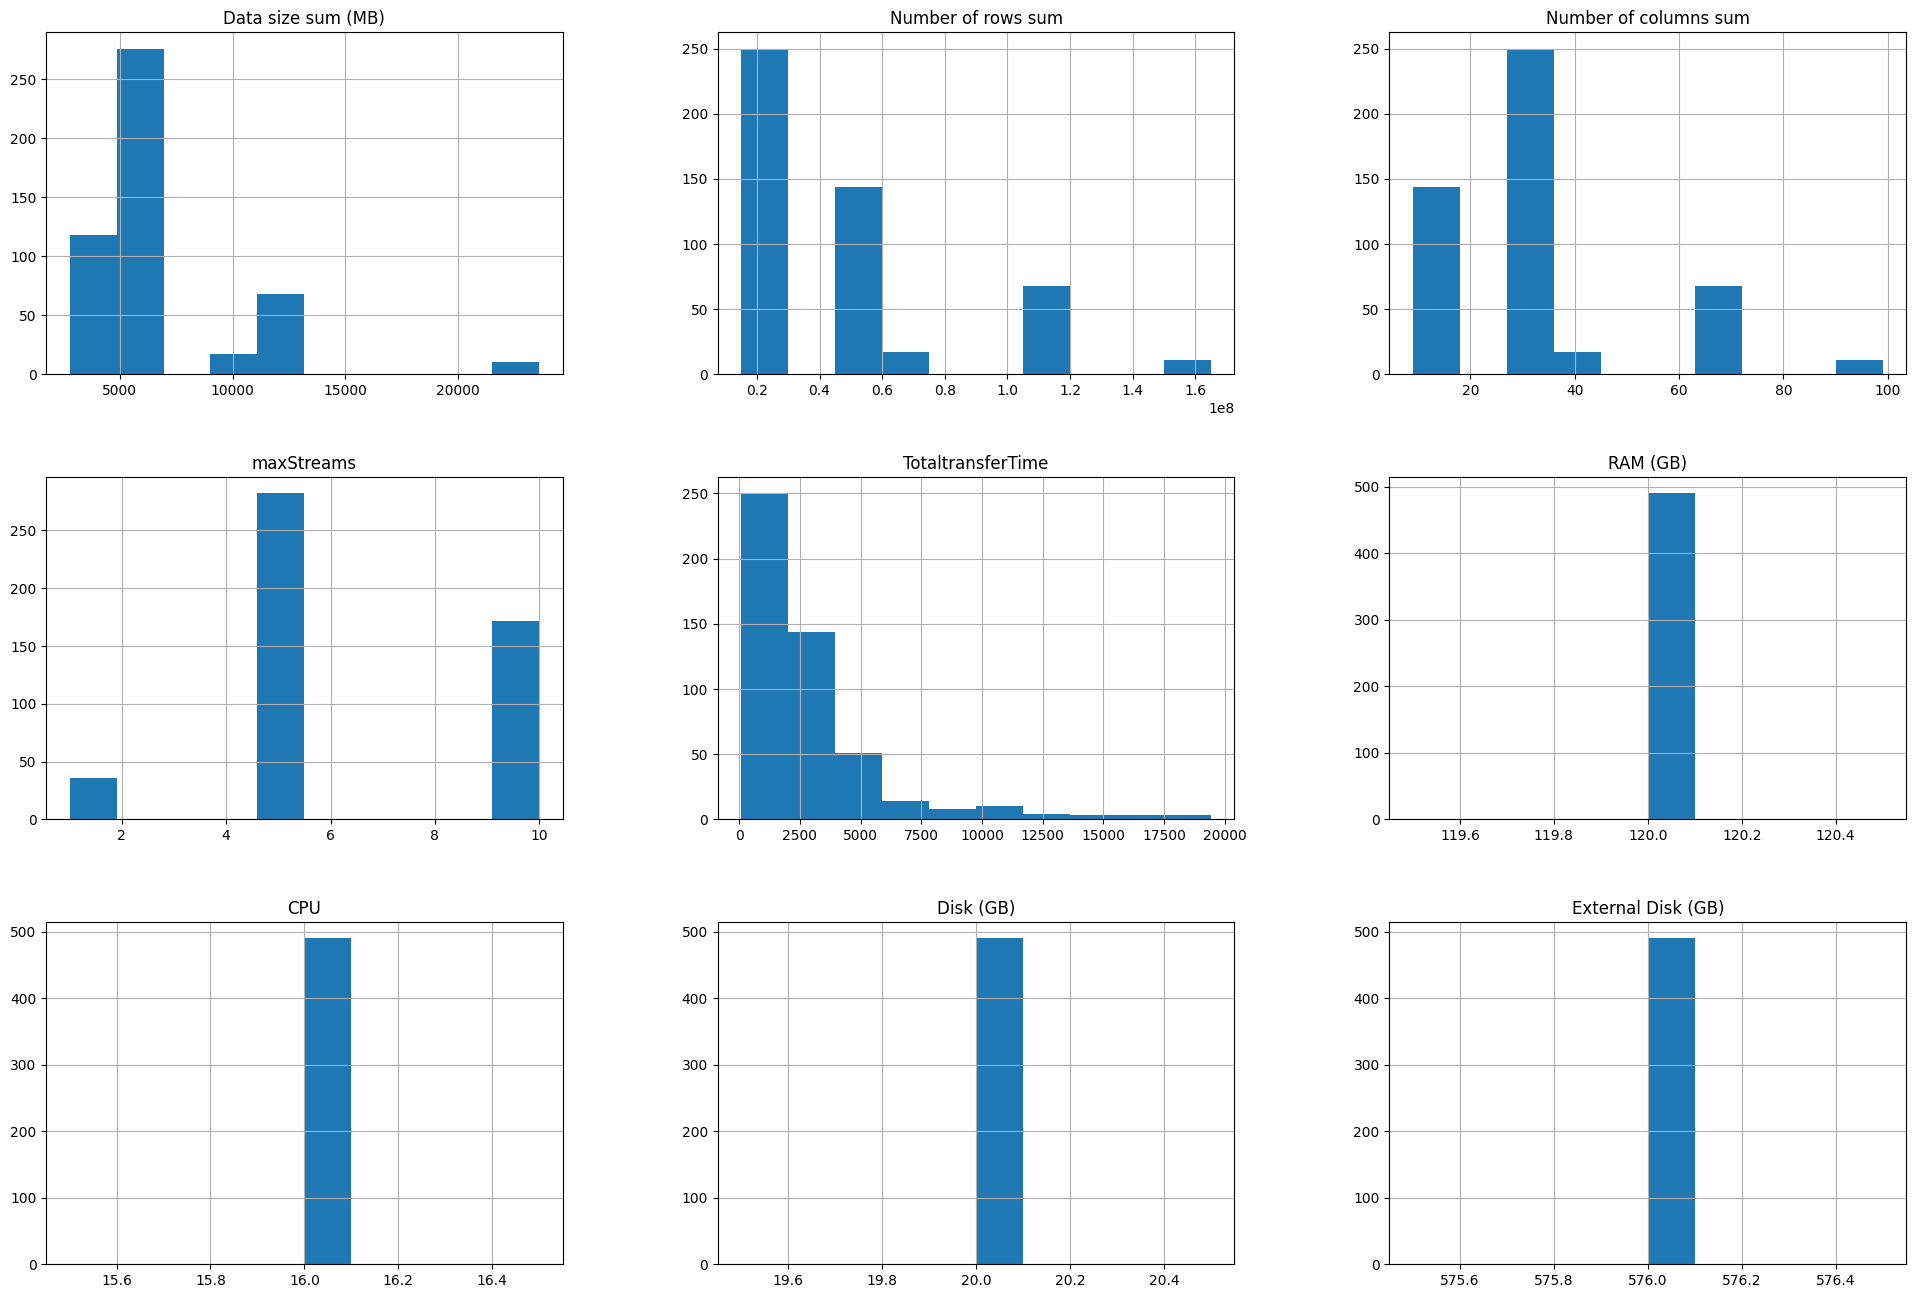

In [91]:
result_df.hist(figsize=(24, 16))
plt.show()

### 4.4 Pairwise correlation using seaborn


In [92]:
# Uncomment to generate pairplot (disabled for performance reasons)

# sns.pairplot(result_df)

## 5. Preprocessing

### 5.1 Create a pipeline


In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [94]:
# Separate numerical and categorical columns
num_cols = result_df.select_dtypes(include='number').columns.to_list()
cat_cols = result_df.select_dtypes(exclude='number').columns.to_list()

# Exclude the target from numerical columns
num_cols.remove("TotaltransferTime")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [95]:
# Display the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Data size sum (MB)', 'Number of rows sum',
                                  'Number of columns sum', 'maxStreams',
                                  'RAM (GB)', 'CPU', 'Disk (GB)',
                                  'External Disk (GB)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['compress', 'binary'])])

In [96]:
# Apply the preprocessing pipeline on the dataset
result_df_prepared = preprocessing.fit_transform(result_df)

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names = preprocessing.get_feature_names_out()
result_df_prepared = pd.DataFrame(data=result_df_prepared, columns=feature_names)

result_df_prepared

,num__Data size sum (MB),num__Number of rows sum,num__Number of columns sum,num__maxStreams,num__RAM (GB),num__CPU,num__Disk (GB),num__External Disk (GB),cat__compress_GZIP,cat__compress_LZ4,cat__compress_NO,cat__binary_False,cat__binary_True,remainder__TotaltransferTime
0,-0.886367,-0.626309,0.185133,-1.953449,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3266.620216
1,-0.886367,-0.626309,0.185133,-1.953449,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,588.320576
2,-0.886367,-0.626309,0.185133,-1.953449,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1920.935266
3,-0.886367,-0.626309,0.185133,-1.953449,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3783.924402
4,-0.886367,-0.626309,0.185133,-1.953449,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1901.642637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1.563150,1.794134,1.644226,-0.522672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3031.400081
486,1.563150,1.794134,1.644226,-0.522672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3268.497884
487,1.563150,1.794134,1.644226,-0.522672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5473.799116
488,1.563150,1.794134,1.644226,-0.522672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4401.501568


## 6. Selecting Model and Training

### 6.1 Split the dataset into a training dataset (80%) and testing dataset (20%).


In [97]:
from sklearn.model_selection import train_test_split

# Splitting data into features and target variable
X = result_df_prepared.drop(["remainder__TotaltransferTime"], axis=1)
y = result_df_prepared["remainder__TotaltransferTime"]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(392, 13) (392,) (98, 13) (98,)


### 6.2 Define a function to report regression metrics


In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    report = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "R² Score": r2
    }

    for metric, value in report.items():
        print(f"{metric}: {value:.4f}")

    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "R² Score": r2
    }

### 6.3 Train and Evaluate Models

We will train and evaluate several models, including Decision Tree, Random Forest, Gradient Boosting, and XGBoost.

#### Decision Tree Regressor

In [99]:
# Dictionary to store the reports
reports = {}
feature_importances = {}

Hyperparameter tuning using Random Search 

In [100]:
# Decision Tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [101]:
# Randomized Search
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

dt_model = DecisionTreeRegressor(random_state=42)
random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f"Best Parameters (Random Search): {best_params_random}")
print(f"Best Score (Random Search): {best_score_random}\n")

# Train the best model from Randomized Search
best_dt_model_random = DecisionTreeRegressor(**best_params_random, random_state=42)
best_dt_model_random.fit(X_train, y_train)
y_pred_dt_random = best_dt_model_random.predict(X_test)

print("Decision Tree Regressor Report (Random Search):")
reports["Decision Tree (Random Search)"] = regression_report(y_test, y_pred_dt_random)

Best Parameters (Random Search): {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 13}
Best Score (Random Search): 0.589444389044864

Decision Tree Regressor Report (Random Search):
Mean Absolute Error (MAE): 1216.6888
Mean Squared Error (MSE): 3112968.9937
Root Mean Squared Error (RMSE): 1764.3608
R² Score: 0.7068


In [102]:
# Grid Search
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree_reg = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print(f"Best Parameters (Grid Search): {best_params_grid}")
print(f"Best Score (Grid Search): {best_score_grid}\n")

# Train the best model from Grid Search
best_dt_model_grid = DecisionTreeRegressor(**best_params_grid, random_state=42)
best_dt_model_grid.fit(X_train, y_train)
y_pred_dt_grid = best_dt_model_grid.predict(X_test)

print("Decision Tree Regressor Report (Grid Search):")
reports["Decision Tree (Grid Search)"] = regression_report(y_test, y_pred_dt_grid)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters (Grid Search): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score (Grid Search): -3369700.6693137935

Decision Tree Regressor Report (Grid Search):
Mean Absolute Error (MAE): 1222.5824
Mean Squared Error (MSE): 3145847.3078
Root Mean Squared Error (RMSE): 1773.6537
R² Score: 0.7037


In [103]:
# Choose the best model based on R² Score
best_model = None
best_report = None

if reports["Decision Tree (Random Search)"]["R² Score"] > reports["Decision Tree (Grid Search)"]["R² Score"]:
    best_model = best_dt_model_random
    best_report = reports["Decision Tree (Random Search)"]
    best_params = best_params_random
else:
    best_model = best_dt_model_grid
    best_report = reports["Decision Tree (Grid Search)"]
    best_params = best_params_grid

print("Best Model Report:")
for metric, value in best_report.items():
    print(f"{metric}: {value:.4f}")

print(f"Best Parameters: {best_params}")

# Store feature importances for the best model
feature_names = X_train.columns  # Assuming X_train is a DataFrame
dt_importances = np.zeros(len(feature_names))
dt_importances[:len(best_model.feature_importances_)] = best_model.feature_importances_
feature_importances["Decision Tree"] = dt_importances

Best Model Report:
Mean Absolute Error (MAE): 1216.6888
Mean Squared Error (MSE): 3112968.9937
Root Mean Squared Error (RMSE): 1764.3608
R² Score: 0.7068
Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 13}


#### Random Forest Regressor


In [104]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [105]:
# Default Random Forest
default_rf_model = RandomForestRegressor(random_state=42)
default_rf_model.fit(X_train, y_train)
y_pred_rf_default = default_rf_model.predict(X_test)

print("Random Forest Regressor Report (Default):")
reports["Random Forest (Default)"] = regression_report(y_test, y_pred_rf_default)

Random Forest Regressor Report (Default):
Mean Absolute Error (MAE): 1225.5745
Mean Squared Error (MSE): 3072876.4222
Root Mean Squared Error (RMSE): 1752.9622
R² Score: 0.7106


In [106]:
# Randomized Search for Random Forest
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(1, 20),
    'max_leaf_nodes': randint(2, 20)
}

rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f"Best Parameters (Random Search): {best_params_random}")
print(f"Best Score (Random Search): {best_score_random}\n")

# Train the best model from Randomized Search
best_rf_model_random = RandomForestRegressor(**best_params_random, random_state=42)
best_rf_model_random.fit(X_train, y_train)
y_pred_rf_random = best_rf_model_random.predict(X_test)

print("Random Forest Regressor Report (Random Search):")
reports["Random Forest (Random Search)"] = regression_report(y_test, y_pred_rf_random)

Best Parameters (Random Search): {'max_depth': 16, 'max_features': 'sqrt', 'max_leaf_nodes': 18, 'n_estimators': 11}
Best Score (Random Search): 0.5923336564317886

Random Forest Regressor Report (Random Search):
Mean Absolute Error (MAE): 1292.1791
Mean Squared Error (MSE): 3244081.7508
Root Mean Squared Error (RMSE): 1801.1335
R² Score: 0.6945


In [107]:
# Grid Search for Random Forest
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print(f"Best Parameters (Grid Search): {best_params_grid}")
print(f"Best Score (Grid Search): {best_score_grid}\n")

# Train the best model from Grid Search
best_rf_model_grid = RandomForestRegressor(**best_params_grid, random_state=42)
best_rf_model_grid.fit(X_train, y_train)
y_pred_rf_grid = best_rf_model_grid.predict(X_test)

print("Random Forest Regressor Report (Grid Search):")
reports["Random Forest (Grid Search)"] = regression_report(y_test, y_pred_rf_grid)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (Grid Search): {'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}
Best Score (Grid Search): -3684183.920675815

Random Forest Regressor Report (Grid Search):
Mean Absolute Error (MAE): 1241.3135
Mean Squared Error (MSE): 3053699.4590
Root Mean Squared Error (RMSE): 1747.4838
R² Score: 0.7124


In [108]:
# Choose the best model based on R² Score
best_model_rf = None
best_report_rf = None

if "Random Forest (Default)" in reports and \
   "Random Forest (Random Search)" in reports and \
   "Random Forest (Grid Search)" in reports:
    
    r2_default = reports["Random Forest (Default)"]["R² Score"]
    r2_random = reports["Random Forest (Random Search)"]["R² Score"]
    r2_grid = reports["Random Forest (Grid Search)"]["R² Score"]
    
    if r2_default >= r2_random and r2_default >= r2_grid:
        best_model_rf = default_rf_model
        best_report_rf = reports["Random Forest (Default)"]
        best_params_rf = "Default Parameters"
    elif r2_random >= r2_default and r2_random >= r2_grid:
        best_model_rf = best_rf_model_random
        best_report_rf = reports["Random Forest (Random Search)"]
        best_params_rf = best_params_random
    else:
        best_model_rf = best_rf_model_grid
        best_report_rf = reports["Random Forest (Grid Search)"]
        best_params_rf = best_params_grid

    print("Best Random Forest Model Report:")
    for metric, value in best_report_rf.items():
        print(f"{metric}: {value:.4f}")

    print(f"Best Parameters: {best_params_rf}")

    # Store feature importances for the best Random Forest model
    feature_names = X_train.columns  # Assuming X_train is a DataFrame
    rf_importances = np.zeros(len(feature_names))
    rf_importances[:len(best_model_rf.feature_importances_)] = best_model_rf.feature_importances_
    feature_importances["Random Forest"] = rf_importances
else:
    print("One of the searches did not return a valid model.")

Best Random Forest Model Report:
Mean Absolute Error (MAE): 1241.3135
Mean Squared Error (MSE): 3053699.4590
Root Mean Squared Error (RMSE): 1747.4838
R² Score: 0.7124
Best Parameters: {'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}


In [109]:
# 7. Model Interpretation using Dalex
exp = dx.Explainer(best_model_rf, X_train, y_train)
exp.model_performance()

Preparation of a new explainer is initiated

  -> data              : 392 rows 13 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 392 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x0000018B5EDA3E20> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.18e+03, mean = 2.58e+03, max = 1.64e+04
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -6.08e+03, mean = 40.2, max = 7.63e+03
  -> model_info        : package sklearn

A new explainer has been created!


,mse,rmse,r2,mae,mad
RandomForestRegressor,2.736931e+06,1654.367307,0.685892,1115.291027,823.130795


In [110]:
# # Random Forest Explainer
# rf_explainer = dx.Explainer(rf_pipeline, X_test, y_test, label="Random Forest Model")

In [111]:
# # Prediction Breakdown for Random Forest
# rf_pred_breakdown = rf_explainer.predict_parts(X_test.iloc[sample_idx])
# rf_pred_breakdown.plot(show=False)
# plt.title('Random Forest: Prediction Breakdown')
# plt.show()

# # Feature Importance for Random Forest
# rf_feature_importance = rf_explainer.model_parts()
# rf_feature_importance.plot(show=False)
# plt.title('Random Forest: Feature Importance')
# plt.show()

# # Model Performance for Random Forest
# rf_model_perf = rf_explainer.model_performance()
# rf_model_perf.plot(show=False)
# plt.title('Random Forest: Model Performance')
# plt.show()

# # Residual Plot for Random Forest
# rf_residual_plot = rf_explainer.model_performance().plot_residual(show=False)
# plt.title('Random Forest: Residual Plot')
# plt.show()


#### Gradient Boosting Regressor


In [112]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [113]:
# Gradient Boosting Default
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb_default = gb_model.predict(X_test)

print("Gradient Boosting Regressor Report (Default):")
reports["Gradient Boosting (Default)"] = regression_report(y_test, y_pred_gb_default)


Gradient Boosting Regressor Report (Default):
Mean Absolute Error (MAE): 1282.6139
Mean Squared Error (MSE): 3208939.4958
Root Mean Squared Error (RMSE): 1791.3513
R² Score: 0.6978


In [114]:
# Randomized Search for Gradient Boosting
param_dist_gb = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(1, 10)
}

gb_model_random = GradientBoostingRegressor(random_state=42)
random_search_gb = RandomizedSearchCV(gb_model_random, param_distributions=param_dist_gb,
                                      n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search_gb.fit(X_train, y_train)
best_params_random_gb = random_search_gb.best_params_
best_score_random_gb = random_search_gb.best_score_

print(f"Best Parameters (Random Search): {best_params_random_gb}")
print(f"Best Score (Random Search): {best_score_random_gb}\n")

# Train the best model from Randomized Search
best_gb_model_random = GradientBoostingRegressor(**best_params_random_gb, random_state=42)
best_gb_model_random.fit(X_train, y_train)
y_pred_gb_random = best_gb_model_random.predict(X_test)

print("Gradient Boosting Regressor Report (Random Search):")
reports["Gradient Boosting (Random Search)"] = regression_report(y_test, y_pred_gb_random)


Best Parameters (Random Search): {'learning_rate': 0.1789067697356303, 'max_depth': 2, 'n_estimators': 160}
Best Score (Random Search): 0.6226074800187256

Gradient Boosting Regressor Report (Random Search):
Mean Absolute Error (MAE): 1304.3753
Mean Squared Error (MSE): 3272400.8015
Root Mean Squared Error (RMSE): 1808.9778
R² Score: 0.6918


In [115]:
# Grid Search for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(estimator=gb_model_random, param_grid=param_grid_gb,
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)
best_params_grid_gb = grid_search_gb.best_params_
best_score_grid_gb = grid_search_gb.best_score_

print(f"Best Parameters (Grid Search): {best_params_grid_gb}")
print(f"Best Score (Grid Search): {best_score_grid_gb}\n")

# Train the best model from Grid Search
best_gb_model_grid = GradientBoostingRegressor(**best_params_grid_gb, random_state=42)
best_gb_model_grid.fit(X_train, y_train)
y_pred_gb_grid = best_gb_model_grid.predict(X_test)

print("Gradient Boosting Regressor Report (Grid Search):")
reports["Gradient Boosting (Grid Search)"] = regression_report(y_test, y_pred_gb_grid)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters (Grid Search): {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best Score (Grid Search): -3166958.4617885435

Gradient Boosting Regressor Report (Grid Search):
Mean Absolute Error (MAE): 1282.3413
Mean Squared Error (MSE): 3175011.5245
Root Mean Squared Error (RMSE): 1781.8562
R² Score: 0.7010


In [116]:
# Choose the best Gradient Boosting model based on R² Score
best_model_gb = None
best_report_gb = None
best_params_gb = None

if "Gradient Boosting (Default)" in reports and \
   "Gradient Boosting (Random Search)" in reports and \
   "Gradient Boosting (Grid Search)" in reports:

    r2_default_gb = reports["Gradient Boosting (Default)"]["R² Score"]
    r2_random_gb = reports["Gradient Boosting (Random Search)"]["R² Score"]
    r2_grid_gb = reports["Gradient Boosting (Grid Search)"]["R² Score"]

    if r2_default_gb >= r2_random_gb and r2_default_gb >= r2_grid_gb:
        best_model_gb = gb_model
        best_report_gb = reports["Gradient Boosting (Default)"]
        best_params_gb = "Default Parameters"
    elif r2_random_gb >= r2_default_gb and r2_random_gb >= r2_grid_gb:
        best_model_gb = best_gb_model_random
        best_report_gb = reports["Gradient Boosting (Random Search)"]
        best_params_gb = best_params_random_gb
    else:
        best_model_gb = best_gb_model_grid
        best_report_gb = reports["Gradient Boosting (Grid Search)"]
        best_params_gb = best_params_grid_gb

    print("Best Gradient Boosting Model Report:")
    for metric, value in best_report_gb.items():
        print(f"{metric}: {value:.4f}")

    print(f"Best Parameters: {best_params_gb}")

    # Store feature importances for the best Gradient Boosting model
    gb_importances = np.zeros(len(feature_names))
    gb_importances[:len(best_model_gb.feature_importances_)] = best_model_gb.feature_importances_
    feature_importances["Gradient Boosting"] = gb_importances
else:
    print("One of the searches did not return a valid model.")

Best Gradient Boosting Model Report:
Mean Absolute Error (MAE): 1282.3413
Mean Squared Error (MSE): 3175011.5245
Root Mean Squared Error (RMSE): 1781.8562
R² Score: 0.7010
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


#### XGBoost Regressor


In [117]:
# XGBoost
import xgboost as xgb


In [118]:
# XGBoost Default
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb_default = xgb_model.predict(X_test)

print("XGBoost Regressor Report (Default):")
reports["XGBoost (Default)"] = regression_report(y_test, y_pred_xgb_default)

XGBoost Regressor Report (Default):
Mean Absolute Error (MAE): 1217.9524
Mean Squared Error (MSE): 3140755.3697
Root Mean Squared Error (RMSE): 1772.2176
R² Score: 0.7042


In [119]:
# Randomized Search for XGBoost
param_dist_xgb = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb_model_random = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model_random, param_distributions=param_dist_xgb,
                                       n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)
best_params_random_xgb = random_search_xgb.best_params_
best_score_random_xgb = random_search_xgb.best_score_

print(f"Best Parameters (Random Search): {best_params_random_xgb}")
print(f"Best Score (Random Search): {best_score_random_xgb}")

# Train the best model from Randomized Search
best_xgb_model_random = xgb.XGBRegressor(**best_params_random_xgb, objective='reg:squarederror', random_state=42)
best_xgb_model_random.fit(X_train, y_train)
y_pred_xgb_random = best_xgb_model_random.predict(X_test)

print("XGBoost Regressor Report (Random Search):")
reports["XGBoost (Random Search)"] = regression_report(y_test, y_pred_xgb_random)

Best Parameters (Random Search): {'colsample_bytree': 0.8719379119600983, 'learning_rate': 0.15798175208947493, 'max_depth': 5, 'n_estimators': 154, 'subsample': 0.7510915544705179}
Best Score (Random Search): 0.6096526865486509
XGBoost Regressor Report (Random Search):
Mean Absolute Error (MAE): 1257.3523
Mean Squared Error (MSE): 3137884.4248
Root Mean Squared Error (RMSE): 1771.4075
R² Score: 0.7045


In [120]:
# Grid Search for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model_random, param_grid=param_grid_xgb,
                               cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
best_params_grid_xgb = grid_search_xgb.best_params_
best_score_grid_xgb = grid_search_xgb.best_score_

print(f"Best Parameters (Grid Search): {best_params_grid_xgb}")
print(f"Best Score (Grid Search): {best_score_grid_xgb}")

# Train the best model from Grid Search
best_xgb_model_grid = xgb.XGBRegressor(**best_params_grid_xgb, objective='reg:squarederror', random_state=42)
best_xgb_model_grid.fit(X_train, y_train)
y_pred_xgb_grid = best_xgb_model_grid.predict(X_test)

print("XGBoost Regressor Report (Grid Search):")
reports["XGBoost (Grid Search)"] = regression_report(y_test, y_pred_xgb_grid)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters (Grid Search): {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score (Grid Search): -3141535.1464236206
XGBoost Regressor Report (Grid Search):
Mean Absolute Error (MAE): 1295.3139
Mean Squared Error (MSE): 3291651.9957
Root Mean Squared Error (RMSE): 1814.2910
R² Score: 0.6900


In [121]:
# Choose the best XGBoost model based on R² Score
best_model_xgb = None
best_report_xgb = None
best_params_xgb = None

if "XGBoost (Default)" in reports and \
   "XGBoost (Random Search)" in reports and \
   "XGBoost (Grid Search)" in reports:

    r2_default_xgb = reports["XGBoost (Default)"]["R² Score"]
    r2_random_xgb = reports["XGBoost (Random Search)"]["R² Score"]
    r2_grid_xgb = reports["XGBoost (Grid Search)"]["R² Score"]

    if r2_default_xgb >= r2_random_xgb and r2_default_xgb >= r2_grid_xgb:
        best_model_xgb = xgb_model
        best_report_xgb = reports["XGBoost (Default)"]
        best_params_xgb = "Default Parameters"
    elif r2_random_xgb >= r2_default_xgb and r2_random_xgb >= r2_grid_xgb:
        best_model_xgb = best_xgb_model_random
        best_report_xgb = reports["XGBoost (Random Search)"]
        best_params_xgb = best_params_random_xgb
    else:
        best_model_xgb = best_xgb_model_grid
        best_report_xgb = reports["XGBoost (Grid Search)"]
        best_params_xgb = best_params_grid_xgb

    print("Best XGBoost Model Report:")
    for metric, value in best_report_xgb.items():
        print(f"{metric}: {value:.4f}")

    print(f"Best Parameters: {best_params_xgb}")

    # Store feature importances for the best XGBoost model
    xgb_importances = np.zeros(len(feature_names))
    xgb_importances[:len(best_model_xgb.feature_importances_)] = best_model_xgb.feature_importances_
    feature_importances["XGBoost"] = xgb_importances
else:
    print("One of the searches did not return a valid model.")

Best XGBoost Model Report:
Mean Absolute Error (MAE): 1257.3523
Mean Squared Error (MSE): 3137884.4248
Root Mean Squared Error (RMSE): 1771.4075
R² Score: 0.7045
Best Parameters: {'colsample_bytree': 0.8719379119600983, 'learning_rate': 0.15798175208947493, 'max_depth': 5, 'n_estimators': 154, 'subsample': 0.7510915544705179}


### 6.4 Summary of Model Performance

Convert the reports dictionary to a DataFrame and display the results.


In [122]:
# Convert the reports dictionary to a DataFrame
reports_df = pd.DataFrame.from_dict(reports, orient='index')
print(reports_df)

# # Save the DataFrame to a CSV file
# reports_df.to_csv("model_performance_reports.csv", index=True)

                                   Mean Absolute Error (MAE)  \
Decision Tree (Random Search)                    1216.688804   
Decision Tree (Grid Search)                      1222.582362   
Random Forest (Default)                          1225.574514   
Random Forest (Random Search)                    1292.179129   
Random Forest (Grid Search)                      1241.313487   
Gradient Boosting (Default)                      1282.613856   
Gradient Boosting (Random Search)                1304.375254   
Gradient Boosting (Grid Search)                  1282.341321   
XGBoost (Default)                                1217.952440   
XGBoost (Random Search)                          1257.352303   
XGBoost (Grid Search)                            1295.313934   

                                   Mean Squared Error (MSE)  \
Decision Tree (Random Search)                  3.112969e+06   
Decision Tree (Grid Search)                    3.145847e+06   
Random Forest (Default)                   

### 6.5 Feature Importances

Visualize the feature importances for each model.


In [123]:
# Save feature importances to a CSV file
feature_importances_df = pd.DataFrame(feature_importances, index=feature_names)
print(feature_importances_df)

# # Save the DataFrame to a CSV file
# feature_importances_df.to_csv("feature_importances.csv", index=True)

                            Decision Tree  Random Forest  Gradient Boosting  \
num__Data size sum (MB)          0.633384       0.208273           0.481027   
num__Number of rows sum          0.060476       0.235800           0.153304   
num__Number of columns sum       0.010766       0.257905           0.049842   
num__maxStreams                  0.238567       0.241460           0.269488   
num__RAM (GB)                    0.000000       0.000000           0.000000   
num__CPU                         0.000000       0.000000           0.000000   
num__Disk (GB)                   0.000000       0.000000           0.000000   
num__External Disk (GB)          0.000000       0.000000           0.000000   
cat__compress_GZIP               0.012327       0.014781           0.008644   
cat__compress_LZ4                0.019094       0.017856           0.013412   
cat__compress_NO                 0.010737       0.019909           0.007062   
cat__binary_False                0.007773       0.00

In [124]:
reports_df

,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R² Score
Decision Tree (Random Search),1216.688804,3.112969e+06,1764.360789,0.706799
Decision Tree (Grid Search),1222.582362,3.145847e+06,1773.653661,0.703703
Random Forest (Default),1225.574514,3.072876e+06,1752.962185,0.710576
Random Forest (Random Search),1292.179129,3.244082e+06,1801.133463,0.694450
Random Forest (Grid Search),1241.313487,3.053699e+06,1747.483751,0.712382
Gradient Boosting (Default),1282.613856,3.208939e+06,1791.351304,0.697760
Gradient Boosting (Random Search),1304.375254,3.272401e+06,1808.977833,0.691783
Gradient Boosting (Grid Search),1282.341321,3.175012e+06,1781.856202,0.700956
XGBoost (Default),1217.952440,3.140755e+06,1772.217642,0.704182
XGBoost (Random Search),1257.352303,3.137884e+06,1771.407470,0.704453


In [125]:
# Find the row index where the max value occurs
max_value_index = reports_df["Root Mean Squared Error (RMSE)"].idxmax()

# Return the value from the first (unnamed) column in the same row
print(max_value_index)

XGBoost (Grid Search)


In [126]:
feature_importances_df

,Decision Tree,Random Forest,Gradient Boosting,XGBoost
num__Data size sum (MB),0.633384,0.208273,0.481027,0.155001
num__Number of rows sum,0.060476,0.235800,0.153304,0.200249
num__Number of columns sum,0.010766,0.257905,0.049842,0.328419
num__maxStreams,0.238567,0.241460,0.269488,0.112935
num__RAM (GB),0.000000,0.000000,0.000000,0.000000
num__CPU,0.000000,0.000000,0.000000,0.000000
num__Disk (GB),0.000000,0.000000,0.000000,0.000000
num__External Disk (GB),0.000000,0.000000,0.000000,0.000000
cat__compress_GZIP,0.012327,0.014781,0.008644,0.036897
cat__compress_LZ4,0.019094,0.017856,0.013412,0.060116
